In [1]:
!pip install ImageHash
!pip install distance
!pip install vptree
!pip install gdown

  Obtaining dependency information for ImageHash from https://files.pythonhosted.org/packages/2d/b4/19a746a986c6e38595fa5947c028b1b8e287773dcad766e648897ad2a4cf/ImageHash-4.3.1-py2.py3-none-any.whl.metadata
  Obtaining dependency information for PyWavelets from https://files.pythonhosted.org/packages/8e/50/5863eba135e64ab164371b42fd455330d047988d7dc56fe6096d42e6aec0/pywavelets-1.5.0-cp310-cp310-win_amd64.whl.metadata
   ---------------------------------------- 296.5/296.5 kB 1.5 MB/s eta 0:00:00
   ---------------------------------------- 4.3/4.3 MB 1.6 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     ------------------------------------ 180.3/180.3 kB 388.2 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16282 sha256=9c1acd60d58980714b81a8d787cc743bb9a8f3cd128398a16dd89142cb5903fc
  Stored in directory: c:\users\temic\appdata\local\pip\cache\wheels\e8\bb\de\f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built distance



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for vptree: filename=vptree-1.3-py3-none-any.whl size=4562 sha256=80c2136930bce3a2915455cfc4e28e2564fa32059a1a8277fa9cf8b100573c8f
  Stored in directory: c:\users\temic\appdata\local\pip\cache\wheels\3a\eb\ca\904b67530bad0ab02a61978e03549e80bfb1ae07363edb3aab
Successfully built vptree



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


  Obtaining dependency information for gdown from https://files.pythonhosted.org/packages/cb/56/f4845ed78723a4eb8eb22bcfcb46e1157a462c78c0a5ed318c68c98f9a79/gdown-5.1.0-py3-none-any.whl.metadata



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!gdown --id 1IQ90jtnITrrcBWsFjF8jkFXF7LAxDqLF

C:\Users\temic\AppData\Local\Programs\Python\Python310\lib\site-packages\gdown\__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses.
	Check FAQ in https://github.com/wkentaro/gdown?tab=readme-ov-file#faq.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1IQ90jtnITrrcBWsFjF8jkFXF7LAxDqLF

but Gdown can't. Please check connections and permissions.


In [3]:
%%time
import zipfile
zip_ref = zipfile.ZipFile("archive.zip", 'r')
zip_ref.extractall("./images_original")
zip_ref.close()

CPU times: total: 40.1 s
Wall time: 2min 21s


In [15]:
import matplotlib.pyplot as plt
def show_images(images, figsize=(20,10), columns = 5):
    plt.figure(figsize=figsize)
    for i, image in enumerate(images):
        plt.subplot(len(images) // columns + 1, columns, i + 1)
        plt.imshow(image)

In [5]:
import os
IMAGE_PATH="./images"
file_names=os.listdir(IMAGE_PATH)
print(f"number of images: {len(file_names)}")

number of images: 5762


In [6]:
from PIL import Image
import imagehash
import numpy as np
import distance
hashes = {}
file_names=os.listdir(IMAGE_PATH)
for file_name in file_names:
    phash=str(imagehash.phash(Image.open(f'{IMAGE_PATH}/{file_name}'),16))
    if phash in hashes:
        hashes[phash].append(file_name)
    else:
        hashes[phash]=[file_name]

In [7]:
print(f"number of unique images: {len(hashes.keys())}")

number of unique images: 5760


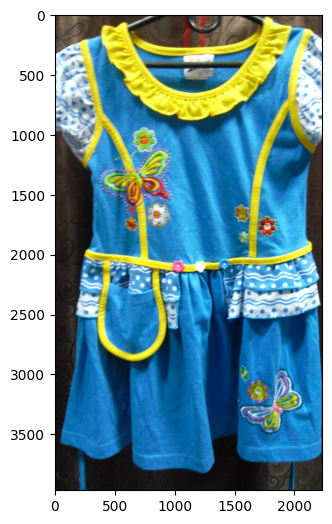

In [17]:
query_image=Image.open(f'{IMAGE_PATH}/0a3e62e3-fac5-4648-9da2-f6bc4074ee31.jpg')
query_image_phash=str(imagehash.phash(query_image,16))
show_images([np.array(query_image)])

In [12]:
%%time
hamming_distances=[]
for phash in hashes.keys():
    hamming_distances.append({"dist":distance.hamming(query_image_phash,phash),"phash":phash})
hamming_distances.sort(key=lambda item: item["dist"])
hamming_distances=hamming_distances[:10]

CPU times: total: 31.2 ms
Wall time: 35 ms


In [13]:
print(hamming_distances)
found_images=[]
for it in hamming_distances:
    found_images.append(hashes[it["phash"]])
found_images = [item for sublist in found_images for item in sublist]
images_np=[]
for image_filename in found_images:
    images_np.append(np.array(Image.open(f'{IMAGE_PATH}/{image_filename}')))

[{'dist': 0, 'phash': 'a41dfbc57ba1a189055405fc50e3e021314958683c6e8bfe5b7f1e5f770d461d'}, {'dist': 52, 'phash': 'fa83817ed5aaaa81855507aa57e57e07a25f224681685fab8bff1f9199107c83'}, {'dist': 52, 'phash': 'ad84641fd2b1cad485585b6a83135beb81ce5a6883f71b7bd7ce394d76a03015'}, {'dist': 53, 'phash': 'bfa8c055c017d78295542fff6eaa7a853845e46e60559be895ae662b97316905'}, {'dist': 53, 'phash': 'b419ec20c3e6d29fd25b03616fc9340734be58ffbc4a0dfa5db3b010c3634369'}, {'dist': 53, 'phash': 'a89bb15494ab5e8db754697ae0ec6801b5420faa921c52b6d09fbfec6f23254d'}, {'dist': 53, 'phash': 'feb9e03195ff0f86ce145a3c914608cbd92838ce9ca321dc5bba610b17b3e61d'}, {'dist': 53, 'phash': '9017cb7e3fa8b081295695a9c0b592fa97e87a059e17612f787f65f87b809605'}, {'dist': 54, 'phash': 'aa1555e554aaa955b88faae9955b902aafd0881fab558699f60a0555f2aaf74c'}, {'dist': 54, 'phash': '854b43c17bc1a157782ab4bc3cb594b02c169e96653eda06e5be9c3fc7a01877'}]


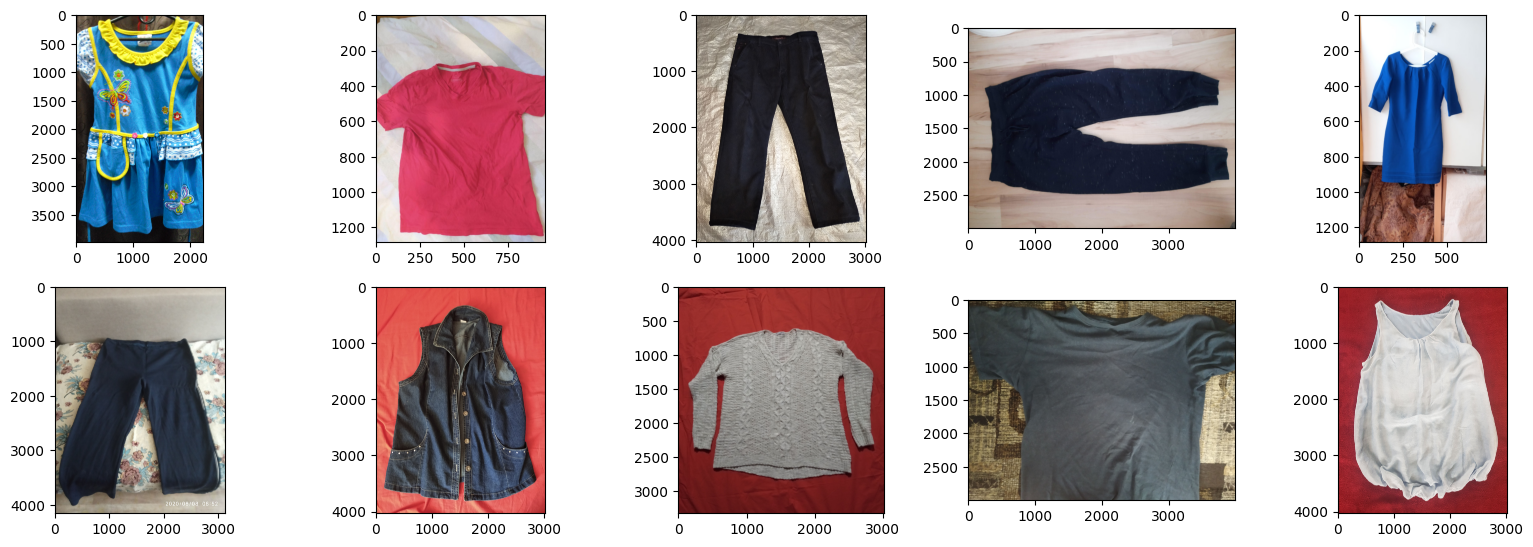

In [16]:
show_images(images_np)

In [22]:
import vptree
tree = vptree.VPTree(list(hashes.keys()), distance.hamming)

In [23]:
%%time
neighbors=tree.get_n_nearest_neighbors(query_image_phash, 3)

CPU times: total: 31.2 ms
Wall time: 33.3 ms


In [24]:
print(neighbors)
vptree_found_images=[]
for neighbor in neighbors:
    vptree_found_images.append(hashes[neighbor[1]])
vptree_found_images = [item for sublist in vptree_found_images for item in sublist]
images_np_vptree=[]
for image_filename in vptree_found_images:
    images_np_vptree.append(np.array(Image.open(f'{IMAGE_PATH}/{image_filename}')))

[(0, 'a41dfbc57ba1a189055405fc50e3e021314958683c6e8bfe5b7f1e5f770d461d'), (52, 'ad84641fd2b1cad485585b6a83135beb81ce5a6883f71b7bd7ce394d76a03015'), (52, 'fa83817ed5aaaa81855507aa57e57e07a25f224681685fab8bff1f9199107c83')]


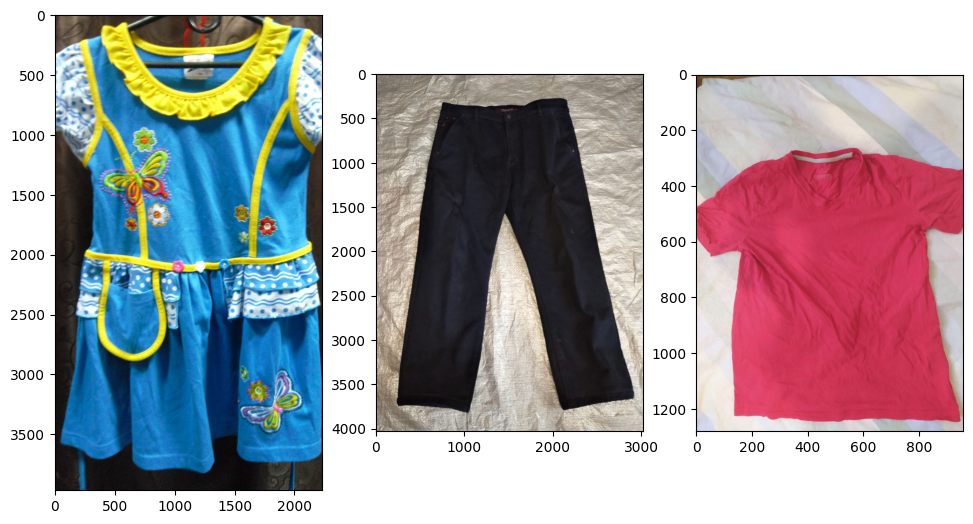

In [25]:
show_images(images_np_vptree)